# Homework 7 writeup solutions

## Name: Jaiden Atterbury

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate

### Part a - Timing RK45 and BDF

In [2]:
# Define constants:
s = 77.27
w = 0.161

# Define function that redifnes ODEs corresponding to value of q:
def get_ODEs(qval):
    y1_prime = lambda y1, y2, y3: s * (y2 - y1*y2 + y1 - qval*y1**2)
    y2_prime = lambda y1, y2, y3: (-y2 - y1*y2 + y3)/s
    y3_prime = lambda y1, y2, y3: w * (y1 - y3)


    odefun = lambda t, y: np.array([y1_prime(y[0], y[1], y[2]),
                                    y2_prime(y[0], y[1], y[2]),
                                    y3_prime(y[0], y[1], y[2])])

    return odefun

# Define initial condition:
y_init = np.array([1, 2, 3])

# Define the 10 logarithmically spaced points:
qs = np.logspace(0, -5, 10)

# Part (i):

# Define solution template:
time_q_45 = np.zeros(len(qs))

# Loop over them (RK45):
for index, qval in enumerate(qs):
    ode_sys = get_ODEs(qval)
    time_0 = time.perf_counter()
    sol = scipy.integrate.solve_ivp(ode_sys, [0, 30], y_init)
    time_45 = time.perf_counter() - time_0
    time_q_45[index] = time_45

# Part (ii):

# Define solution template:
time_q_BDF = np.zeros(len(qs))

# Loop over them (BDF):
for index, qval in enumerate(qs):
    ode_sys = get_ODEs(qval)
    time_0 = time.perf_counter()
    sol = scipy.integrate.solve_ivp(ode_sys, [0, 30], y_init, method="BDF")
    time_BDF = time.perf_counter() - time_0
    time_q_BDF[index] = time_BDF

### Part b - Create a loglog plot

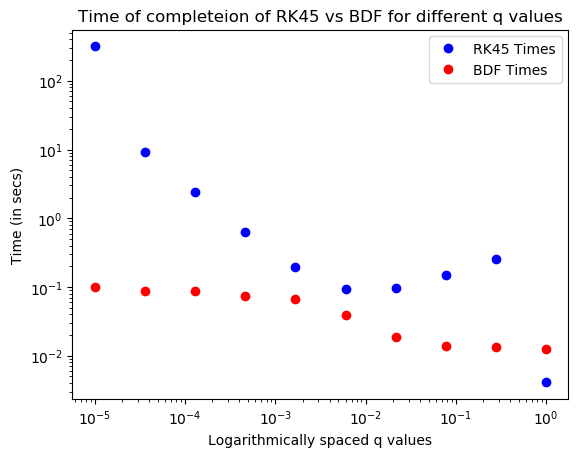

In [3]:
fig, ax = plt.subplots()
ax.loglog(qs, time_q_45, "bo", label="RK45 Times")
ax.loglog(qs, time_q_BDF, "ro", label="BDF Times")
ax.set_title("Time of completeion of RK45 vs BDF for different q values")
ax.set_xlabel("Logarithmically spaced q values")
ax.set_ylabel("Time (in secs)")
ax.legend()

### Part c - Create a 2 panel figure.
Below we'll plot the 2 panel figure for the RK45 solution.

In [48]:
# Define t values to make the curves smooth:
ts = np.linspace(0, 30, 100000)

# Get the RK45 solution for smallest q:
q_small = qs[-1]
ode_small = get_ODEs(q_small)
sol_45s = scipy.integrate.solve_ivp(ode_small, [0, 30], y_init, t_eval=ts)

# Get the RK45 solution for second largest q:
q_large = qs[1]
ode_large = get_ODEs(q_large)
sol_45l = scipy.integrate.solve_ivp(ode_large, [0, 30], y_init, t_eval=ts)


125519
1012


Text(0.5, 1.0, 'Plot of y1 solution as a function of time for 2 different q values (RK45)')

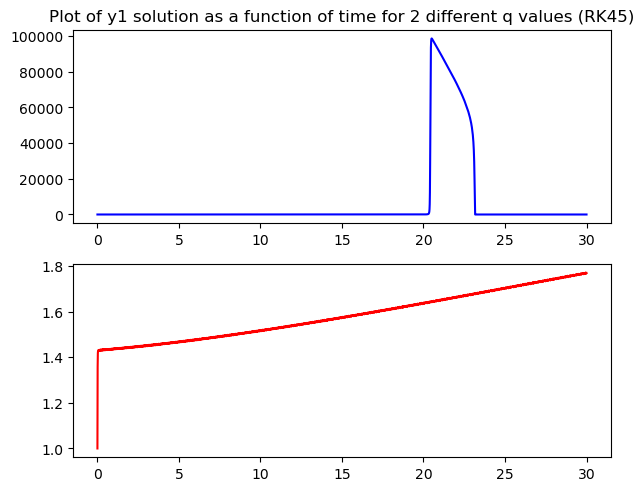

In [23]:
fig1, ax1 = plt.subplots(2, 1, constrained_layout=True)
ax1[0].plot(ts, sol_45s.y[0,:], 'b') 
ax1[1].plot(ts, sol_45l.y[0,:], 'r')
ax1[0].set_title("Plot of y1 solution as a function of time for 2 different q values (RK45)")

Below we'll plot the 2 panel figure for the BDF solution.

In [24]:
# Get the BDF solution for smallest q:
sol_BDFs = scipy.integrate.solve_ivp(ode_small, [0, 30], y_init, t_eval=ts, method="BDF")

# Get the BDF solution for second largest q:
sol_BDFl = scipy.integrate.solve_ivp(ode_large, [0, 30], y_init, t_eval=ts, method="BDF")

Text(0.5, 1.0, 'Plot of y1 solution as a function of time for 2 different q values (BDF)')

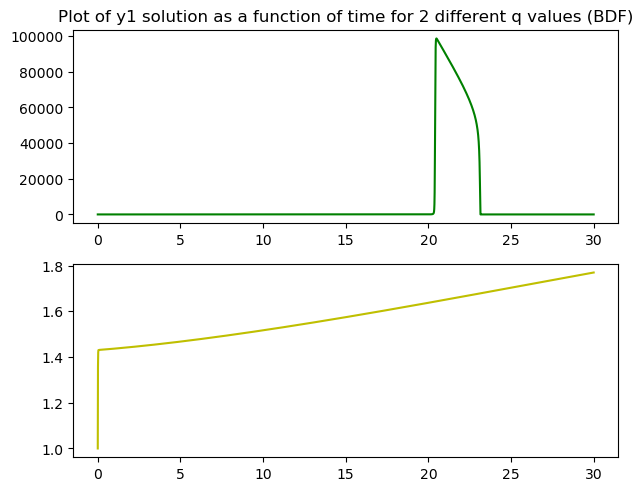

In [39]:
fig2, ax2 = plt.subplots(2, 1, constrained_layout=True)
ax2[0].plot(ts, sol_BDFs.y[0,:], 'g') 
ax2[1].plot(ts, sol_BDFl.y[0,:], 'y')
ax2[0].set_title("Plot of y1 solution as a function of time for 2 different q values (BDF)")

### Part d - Comment on what we see.

##### Part (i) - Compare the two methods
For small q, we can see that the BDF method is much better for solving this problem as the RK45 method takes much more time to complete when compared to the BDF method. In particular, the BDF method/any implicit method is better than RK45 when the ODE is stiff. However, it is important to note that when the ODE is not stiff, explicit methods are usually best for solving an ODE problem since they're usually faster,as seen by the time taken to solve for the largest q.

##### Part (ii) - Time as q decreases
As can be seen from the plot of time to completetion versus values of q for the RK45 method, time appears to be changing quadratically as q decreases. Although, when looking at the in-class solution, the time appeared to be changing linearly as q decreased. The difference between our plots comes down to different factors/runtimes unique to each machine

##### Part (iii) - What makes calculation slower for RK45?
As can be seen from the plots of the solution, RK45 is much slower for small q than for larger q. This happens because there is a massive change in magnitude for smaller q. This can be seen by looking at the vertical axis for both plots. For smaller q the vertical axis goes all the way to 100,000, while for larger q the vertical axis stays in the 1s. This can phenomenon can also be explained by the amount of time values it took to compute the solution using RK45. For smaller q it took 125519 points to compute the solution, while for larger q it took 1012 points. This drastic difference in the amount of points computed/step size accounts for most of the time difference seen between the calculation of the ODE for the different q values.

##### Part (iv) - Is this equation stiff? How do we know?
As can be seen from the plot of the times the equation is stiff for small q. This can be seen by the increasing time it takes to compute the solution. This time increase happens because the algorithm has to keep computing smaller and smaller dt values in order for the solution to converge/stabelize. Furthermore, we can see this stiffness in the plot of the solution, as for the smallest q value used to compute the solution, there is a sudden and big in magnitude jump in the solution. In particular, this jump is an increase of around 5 degrees of magnitude.

## Problem 2

### Part a - Ratio of points, RK45 to BDF.

In [3]:
# Define the parameters we are going to use:
mu = 200

# Define the ODEs:
dxdt = lambda x, y: y
dydt = lambda x, y: mu*(1 - x**2)*y - x

# Define adapter ODE:
odefun = lambda t, v: np.array([dxdt(v[0], v[1]),
                                dydt(v[0], v[1])])

# Define t value array to make curve smooth:
tspan = np.linspace(0, 400, 1000000)

# Define initial conditions
x_init = np.array([2, 0])

# Get RK45 solution:
sol_45 = scipy.integrate.solve_ivp(odefun, [0, 400], x_init)

# Get BDF solution:
sol_bdf = scipy.integrate.solve_ivp(odefun, [0, 400], x_init, method="BDF")

# Find the total amount of points used for RK45 and BDF
len_45 = len(sol_45.t)
len_BDF = len(sol_bdf.t)

46401
298
46103


As computed above, there were 46401 time points used in the RK45 solution, while on the other hand the BDF solution only took 298 time points. Thus, the RK45 solution had 46103 more points used than the BDF solution. Furthermore, looking at the ratio of the points, RK45 uses around 156 times more points than the BDF solution

#### Part b - Plot solution, x(t)

Below we will plt the x(t) solution for the RK45 method.

Text(0, 0.5, 'x(t)')

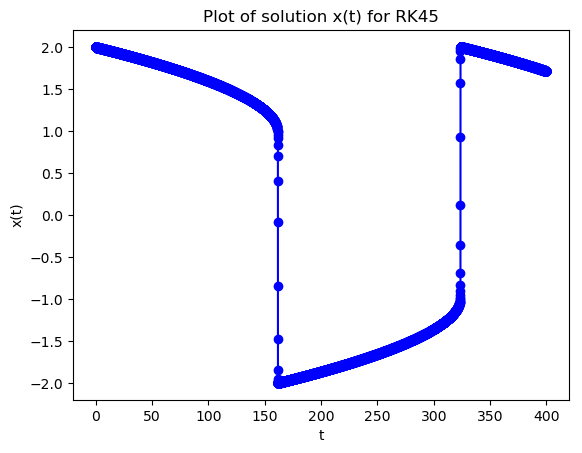

In [5]:
# Get RK45 solution at tspan:
sol_45 = scipy.integrate.solve_ivp(odefun, [0, 400], x_init)

# Plot x(t):
fig3, ax3 = plt.subplots()
ax3.plot(sol_45.t, sol_45.y[0,:], "bo-")
ax3.set_title("Plot of solution x(t) for RK45")
ax3.set_xlabel("t")
ax3.set_ylabel("x(t)")

Below we will plot the x(t) solution using the BDF method.

Text(0, 0.5, 'x(t)')

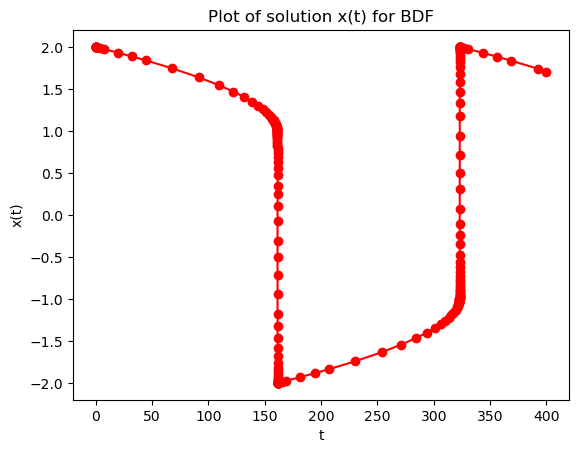

In [6]:
# Get BDF solution at tspan:
sol_bdf = scipy.integrate.solve_ivp(odefun, [0, 400], x_init, method="BDF")

# Plot x(t):
fig4, ax4 = plt.subplots()
ax4.plot(sol_bdf.t, sol_bdf.y[0,:], "ro-")
ax4.set_title("Plot of solution x(t) for BDF")
ax4.set_xlabel("t")
ax4.set_ylabel("x(t)")

##### Part c - Plot x(t) vs. y(t) (y(t) on vertical axis)

Below we will plot the x(t) solution versus the y(t) solution using the BDF method.

Text(0, 0.5, 'y(t)')

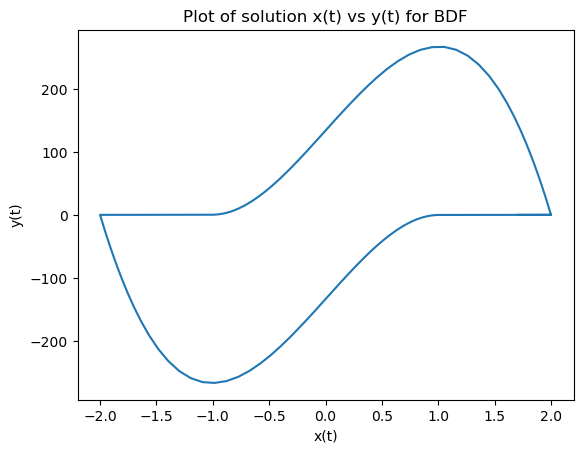

In [43]:
# Plot x(t) vs y(t):
fig5, ax5 = plt.subplots()
ax5.plot(sol_bdf.y[0,:], sol_bdf.y[1,:])
ax5.set_title("Plot of solution x(t) vs y(t) for BDF")
ax5.set_xlabel("x(t)")
ax5.set_ylabel("y(t)")

##### Part d - Discussion

We can tell this ODE is stiff simply from the amount of time points needed to compute the solution using RK45. In particular, since there were a lot of time points used, the dt is very small. Furthermore, since RK45 is an explicit method, we know from the ODE lecture notes that using an explicit method, a very small step size is needed to solve stiff problems. Thus, since it took a very small step size to find the solution, and there is a "sudden jump" in the solution plot for x(t), we can tell that this ODE is stiff.